# Part 2: Sentiment Analysis

Sentiment analysis is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Sentiment analysis allows businesses to identify customer sentiment toward products, brands or services in online conversations and feedback.

![](image.png)

## Approach : Natural Language Processing (NLTK)

We have approached the solution to this problem using NLTK library available in python which is generally using to analyze textual data. We used two of the popular libraries for performing this task:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.


2. TextBlob - Library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more

## 2.1: Sentiment analysis using TextBlob

In [1]:
import pandas as pd
import numpy as np
import os

from textblob import TextBlob

import warnings 
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')
%matplotlib inline

#### Reading the dataset..

In [2]:
# Next we import the dataframe containing the comments on New York Times articles published in April 2018
comments = pd.read_csv(os.path.join('dataset', 'CommentsApril2018.csv'))


#### Display the data..

In [3]:
comments.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1524594282,5adf6684068401528a2aa69b,781.0,How could the league possibly refuse this offe...,26853969.0,26853969.0,<br/>,comment,1524594011,1.0,...,approved,1,0,News,1524594282,Christopher Rillo,46566740.0,San Francisco,NaN,NaN
1,1524594252,5adf6684068401528a2aa69b,781.0,"So then the execs can be like ""yeah...we will ...",26853699.0,26853699.0,<br/>,comment,1524593146,1.0,...,approved,1,0,News,1524594252,Matt Brand,64324866.0,"Williamsburg, Brooklyn",NaN,NaN
2,1524594250,5adf6684068401528a2aa69b,781.0,I would not want to play chess against these c...,26853677.0,26853677.0,<br/>,comment,1524593032,1.0,...,approved,1,0,News,1524594250,Joseph,78105093.0,"Fayetteville, AR",NaN,NaN
3,1524593431,5adf6684068401528a2aa69b,781.0,Could the cheerleaders join the Actors' Equity...,26853784.0,26853784.0,<br/>,comment,1524593426,1.0,...,approved,0,0,News,1524593431,Stephen,81939618.0,"Phoenix, AZ",NaN,NaN
4,1524595048,5adf653f068401528a2aa697,656.0,Seeking conclusions which support preconceived...,26854236.0,26854236.0,<br/>,comment,1524595043,1.0,...,approved,1,0,News,1524595048,Paul Zorsky,58642997.0,Texas,NaN,NaN


In [4]:
comments.shape

(264924, 34)

#### Using the 'sentiment' function to calculate polarity and subjectivity..

In [5]:
comments['polarity'] = comments.commentBody.map(lambda text: TextBlob(text).sentiment.polarity)
comments['subjectivity'] = comments.commentBody.map(lambda text: TextBlob(text).sentiment.subjectivity)

In [6]:
comments[['commentBody','polarity', 'subjectivity']]

,commentBody,polarity,subjectivity
0,How could the league possibly refuse this offe...,0.000000,1.000000
1,"So then the execs can be like ""yeah...we will ...",-0.155556,0.288889
2,I would not want to play chess against these c...,0.000000,0.000000
3,Could the cheerleaders join the Actors' Equity...,0.100000,0.333333
4,Seeking conclusions which support preconceived...,0.012857,0.514286
...,...,...,...
264919,This year was uniquely unoriginal - the four n...,0.335227,0.367424
264920,"Come From Away, last year...",0.000000,0.066667
264921,I love this quiet little musical. Exquisite pe...,0.260227,0.521212
264922,We saw it about 10 days ago. Agree with your ...,0.625000,1.000000


#### Printing 5 random comments with the highest positive score..

In [14]:
print("5 random comments with highest positive sentiment polarity: \n")
cL = comments.loc[comments.polarity==1, ['commentBody']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random comments with highest positive sentiment polarity: 

I agree.  If snarky comments on appearance and spreading unsubstantiated rumors are the best we can do at the highest levels of discourse, what hope is there?

Bravo! Perfectly said.

Your's is the perfect answer.

Rupert Murdoch is probably the greatest threat to democracy who has ever lived. 

What a wonderful pilot and a wonderful silver lining in the face of tragedy.<br/><br/>Thank you, Capt. Tammie Jo Shults!



#### Printing 5 random comments with the highest negative score..

In [9]:
print("5 random comments with most negative sentiment polarity: \n")
cL = comments.loc[comments.polarity==-1, ['commentBody']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random comments with most negative sentiment polarity: 

Since all republican politicians seem to care about are tax cuts and getting re-elected, there's zero hope for stopping the insane Trump administration. <br/><br/>If these republicans cared at all about the country, there would be some reason for hope. 

This horrific chapter in Canada's treatment of indigenous people was designed and funded by Canada's federal government.

Yup.<br/>62 million awful Americans voted for him.

These guys perpetuate the worst stereotypes of politicians who can't see the forest through the thicket of trees.

Bravo!  No woman should depend on any man for anything. It is dangerous!  <br/><br/>I’m for you Jessica.  I say you go woman!  Crush the competition and amaze your enemies!  And THEN REMIND THEM THAT YOU DID!  



#### Printing 5 random comments with the neutral score..

In [10]:
print("5 random comments with most neutral (zero) sentiment polarity:\n ")
cL = comments.loc[comments.polarity==0, ['commentBody']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random comments with most neutral (zero) sentiment polarity:
 
Failing 45 doesn't trust the intelligence community; he only trusts lapdogs that agree to serve the Kremlin.

Most of us do not oppose the existence of the State of Israel. What we oppose is Israel's illegal occupation of Palestinian and Syrian land and Israel's violations of Palestinian human rights. 

I will be amazed if Trump &amp; Co. don't bungle it.

Two at once?  It figures...

You can vote for candidates who share your values.  If you care about human rights you probably don't want to vote for a Republican candidate as that party has now adopted an essentially White nationalist and anti-human rights platform.  



#### Distribution plot of sentiment polarity of comments

Text(0.5, 1.0, 'Distribution of sentiment polarity of comments')

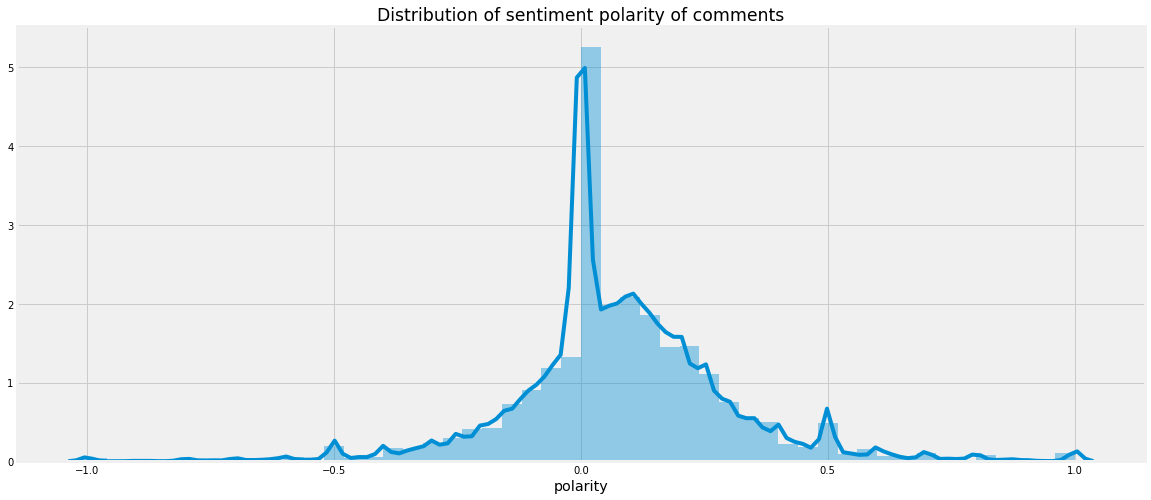

In [12]:
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.distplot(comments.polarity);
plt.title("Distribution of sentiment polarity of comments")

#### Inference: 
Most of the comments usually have a sentiment polarity score close to zero, i.e they are neutral.

## 2.2: Sentiment Analysis using VADER


In [4]:
#Required Imports
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

#### Read dataset

In [2]:
c_april = pd.read_csv('dataset/CommentsApril2018.csv')


/Users/kritikasrivastava/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.



#### Display data..

In [3]:
c_april.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1524594282,5adf6684068401528a2aa69b,781.0,How could the league possibly refuse this offe...,26853969.0,26853969.0,<br/>,comment,1524594011,1.0,...,approved,1,0,News,1524594282,Christopher Rillo,46566740.0,San Francisco,NaN,NaN
1,1524594252,5adf6684068401528a2aa69b,781.0,"So then the execs can be like ""yeah...we will ...",26853699.0,26853699.0,<br/>,comment,1524593146,1.0,...,approved,1,0,News,1524594252,Matt Brand,64324866.0,"Williamsburg, Brooklyn",NaN,NaN
2,1524594250,5adf6684068401528a2aa69b,781.0,I would not want to play chess against these c...,26853677.0,26853677.0,<br/>,comment,1524593032,1.0,...,approved,1,0,News,1524594250,Joseph,78105093.0,"Fayetteville, AR",NaN,NaN
3,1524593431,5adf6684068401528a2aa69b,781.0,Could the cheerleaders join the Actors' Equity...,26853784.0,26853784.0,<br/>,comment,1524593426,1.0,...,approved,0,0,News,1524593431,Stephen,81939618.0,"Phoenix, AZ",NaN,NaN
4,1524595048,5adf653f068401528a2aa697,656.0,Seeking conclusions which support preconceived...,26854236.0,26854236.0,<br/>,comment,1524595043,1.0,...,approved,1,0,News,1524595048,Paul Zorsky,58642997.0,Texas,NaN,NaN


In [4]:
analyser = SentimentIntensityAnalyzer()

#### Using sentimentIntensityAnalyzer to calculate the scores

In [5]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
#commentBody_df = c_april.commentBody.values

In [7]:
sentiment = c_april['commentBody'].apply(lambda x: analyser.polarity_scores(x))
c_april_pd = pd.concat([c_april,sentiment.apply(pd.Series)],1)

#### Saving dataframe to CSV for future use

In [8]:
c_april_pd.to_csv("april18_sentiments.csv")

In [48]:
c_april_pd = pd.read_csv('april18_sentiments.csv')


/Users/kritikasrivastava/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.



In [49]:
c_april_pd.head()

,Unnamed: 0,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,...,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,neg,neu,pos,compound
0,0,1524594282,5adf6684068401528a2aa69b,781.0,How could the league possibly refuse this offe...,26853969.0,26853969.0,<br/>,comment,1524594011,...,1524594282,Christopher Rillo,46566740.0,San Francisco,NaN,NaN,0.239,0.761,0.000,-0.2960
1,1,1524594252,5adf6684068401528a2aa69b,781.0,"So then the execs can be like ""yeah...we will ...",26853699.0,26853699.0,<br/>,comment,1524593146,...,1524594252,Matt Brand,64324866.0,"Williamsburg, Brooklyn",NaN,NaN,0.000,0.889,0.111,0.3612
2,2,1524594250,5adf6684068401528a2aa69b,781.0,I would not want to play chess against these c...,26853677.0,26853677.0,<br/>,comment,1524593032,...,1524594250,Joseph,78105093.0,"Fayetteville, AR",NaN,NaN,0.241,0.610,0.149,-0.0900
3,3,1524593431,5adf6684068401528a2aa69b,781.0,Could the cheerleaders join the Actors' Equity...,26853784.0,26853784.0,<br/>,comment,1524593426,...,1524593431,Stephen,81939618.0,"Phoenix, AZ",NaN,NaN,0.034,0.806,0.160,0.6326
4,4,1524595048,5adf653f068401528a2aa697,656.0,Seeking conclusions which support preconceived...,26854236.0,26854236.0,<br/>,comment,1524595043,...,1524595048,Paul Zorsky,58642997.0,Texas,NaN,NaN,0.068,0.835,0.097,0.4234


#### Creating a new column which categorizes sentiments..

In [13]:
c_april_pd["Sentiment"] = np.NaN

#### Classify column based on compound score..


In [14]:
c_april_pd["Sentiment"] = c_april_pd["compound"].apply(lambda x: 1 if x>=0.05 else (-1 if x< -0.05 else 0))

In [61]:
c_april_pd[:len(c_april_pd)]

,Unnamed: 0,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,...,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,neg,neu,pos,compound
0,0,1524594282,5adf6684068401528a2aa69b,781.0,How could the league possibly refuse this offe...,26853969.0,26853969.0,<br/>,comment,1524594011,...,1524594282,Christopher Rillo,46566740.0,San Francisco,NaN,NaN,0.239,0.761,0.000,-0.2960
1,1,1524594252,5adf6684068401528a2aa69b,781.0,"So then the execs can be like ""yeah...we will ...",26853699.0,26853699.0,<br/>,comment,1524593146,...,1524594252,Matt Brand,64324866.0,"Williamsburg, Brooklyn",NaN,NaN,0.000,0.889,0.111,0.3612
2,2,1524594250,5adf6684068401528a2aa69b,781.0,I would not want to play chess against these c...,26853677.0,26853677.0,<br/>,comment,1524593032,...,1524594250,Joseph,78105093.0,"Fayetteville, AR",NaN,NaN,0.241,0.610,0.149,-0.0900
3,3,1524593431,5adf6684068401528a2aa69b,781.0,Could the cheerleaders join the Actors' Equity...,26853784.0,26853784.0,<br/>,comment,1524593426,...,1524593431,Stephen,81939618.0,"Phoenix, AZ",NaN,NaN,0.034,0.806,0.160,0.6326
4,4,1524595048,5adf653f068401528a2aa697,656.0,Seeking conclusions which support preconceived...,26854236.0,26854236.0,<br/>,comment,1524595043,...,1524595048,Paul Zorsky,58642997.0,Texas,NaN,NaN,0.068,0.835,0.097,0.4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264919,264919,1525195719,5ae82ca3068401528a2ab97a,2055.0,This year was uniquely unoriginal - the four n...,26935618.0,26935618.0,<br/>,userReply,1525195714,...,1525195719,Michael Trenteseau,44062099.0,Atlanta,NaN,NaN,0.000,0.790,0.210,0.9274
264920,264920,1525196941,5ae82ca3068401528a2ab97a,2055.0,"Come From Away, last year...",26935835.0,26935835.0,<br/>,userReply,1525196530,...,1525196941,Mia,64798368.0,Pittsburgh,NaN,NaN,0.000,1.000,0.000,0.0000
264921,264921,1525208529,5ae82ca3068401528a2ab97a,2055.0,I love this quiet little musical. Exquisite pe...,26938328.0,26938328.0,<br/>,userReply,1525208527,...,1525208529,Mindi Reich-Shapiro,39921274.0,NYC,NaN,NaN,0.000,0.725,0.275,0.9001
264922,264922,1525217659,5ae82ca3068401528a2ab97a,2055.0,We saw it about 10 days ago. Agree with your ...,26939746.0,26939746.0,<br/>,userReply,1525217654,...,1525217659,Bob G,52229491.0,St. Louis,NaN,NaN,0.000,0.685,0.315,0.9432


#### Printing 5 random comments with the most positive score..


In [17]:
print("3 random comments with most positive (1) sentiment polarity:\n ")
cL = c_april_pd.loc[c_april_pd.Sentiment==1, ['commentBody']].sample(3).values
for c in cL:
    print(c[0])
    print()

3 random comments with most neutral (zero) sentiment polarity:
 
Actually it's very easy to say. It tipped the election. <br/><br/>Name some other candidates who survived a fictitious 20 month long "investigation" campaign against them. <br/><br/>Try to name them. 

Clinton won the Democratic primaries by a comfortable margin. Are you trying to say that the superdelegates should have overlooked the results of the primaries and cast their votes for Sanders to nominate him for the Democratic nomination?<br/><br/><a href="http://fivethirtyeight.com/features/was-the-democratic-primary-a-close-call-or-a-landslide/" title="http://fivethirtyeight.com/features/was-the-democratic-primary-a-close-call-or-a-landslide/" target="_blank">http://fivethirtyeight.com/features/was-the-democratic-primary-a-close-c...</a>

What we model to children demonstrates to them, in a tangible way, how much or how little they are valued. <br/><br/>I taught night classes for a local university that were held in an I

#### Printing 5 random comments with the most  neutral score..


In [18]:
print("3 random comments with most neutral (zero) sentiment polarity:\n ")
cL = c_april_pd.loc[c_april_pd.Sentiment==0, ['commentBody']].sample(3).values
for c in cL:
    print(c[0])
    print()

3 random comments with most neutral (zero) sentiment polarity:
 
Um, individuality in the queer community is right here, in this article!

Close all Russian Embassy compounds everywhere.  Erase their memories by letting the homeless occupy the space and homestead.  Then, abscond with all Russian money and assets everywhere by freezing the accounts and overturning deeds and raiding their refrigerators. Then kick out all Russian visitors and students from everywhere. Then, cancel all Green Card holders and send them packing. Then raid every store selling Russian Caviars and fumigate the premises with Raid Insect spray and flood the shop with formaldehydes.  Get the wildlife service to roundup all Russian Bears and exile them to the zoo on Elba. Then call Putin and invite him to overnight in the Lincoln Bedroom to discuss vodka distribution.  

As the right shifts further to the right and the left moves further to the left, we are not getting any closer to the middle.  Polarization escala

#### Printing 5 random comments with the highest negative score..


In [19]:
print("3 random comments with most negative (-1) sentiment polarity:\n ")
cL = c_april_pd.loc[c_april_pd.Sentiment==-1, ['commentBody']].sample(3).values
for c in cL:
    print(c[0])
    print()

3 random comments with most neutral (zero) sentiment polarity:
 
There are a lot of stupid people in the world with ridiculous ideas. Maybe they believe those ideas, or maybe they do not. But why give them a megaphone by quoting them? Why assume that they are representative of any significant portion of the population?<br/><br/>Maybe your book does this, but what are you asking for? Confessions like those you quote from white people who now acknowledge their inner racist? To what end? What concrete action items do you propose? Arguing over whether someone is inherently a racist or a beneficiary of a racist system is a useless exercise. Neither side will ever prove the merit of its position.<br/><br/>Focus on what matters. We may be able to agree on things that will make lives better. But you will never convince me that I am a racist. Just like I am sure that I could never do the same to you. So please stop trying.

This will ruin all, oh so civilized, Western nations: neglect of the ed

#### Pie plot for categorizing comments

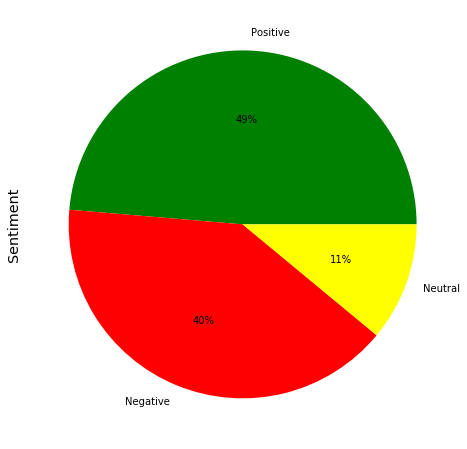

In [22]:
c_april_pd.Sentiment.value_counts().plot(kind='pie', autopct='%2.0f%%', colors=["Green", "red", "yellow"], labels=["Positive", "Negative", "Neutral"])

#### Distribution plot of sentiment polarity of comments

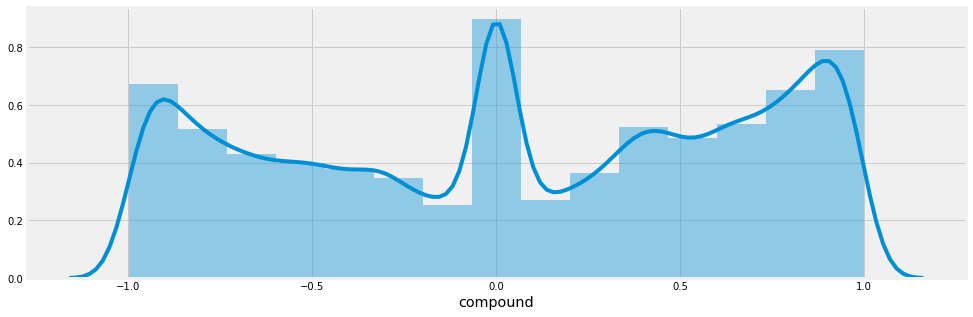

In [57]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
sns.distplot(c_april_pd['compound'], bins=15, ax=ax)
plt.show()

#### Inference : In this plot, we see that There is balance of negative and positive comments in the dataset unlike in TexBlob where the neutral comments were dominent.